In [3]:
import os
import json

import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

Data Collection 

In [43]:
kaggle_config = json.load(open('kaggle.json'))
kaggle_config.keys()

# Setup the environment variables
os.environ['KAGGLE_USERNAME'] = kaggle_config['username']
os.environ['KAGGLE_KEY'] = kaggle_config['key']


In [13]:
!kaggle datasets download notshrirang/spotify-million-song-dataset
!ls

Dataset URL: https://www.kaggle.com/datasets/notshrirang/spotify-million-song-dataset
License(s): CC0-1.0
spotify-million-song-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
kaggle.json  music-recom.ipynb	spotify-million-song-dataset.zip  venv


In [26]:
with zipfile.ZipFile('spotify-million-song-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall()
df = pd.read_csv("spotify_millsongdata.csv")
df

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...
...,...,...,...,...
57645,Ziggy Marley,Good Old Days,/z/ziggy+marley/good+old+days_10198588.html,Irie days come on play \r\nLet the angels fly...
57646,Ziggy Marley,Hand To Mouth,/z/ziggy+marley/hand+to+mouth_20531167.html,Power to the workers \r\nMore power \r\nPowe...
57647,Zwan,Come With Me,/z/zwan/come+with+me_20148981.html,all you need \r\nis something i'll believe \...
57648,Zwan,Desire,/z/zwan/desire_20148986.html,northern star \r\nam i frightened \r\nwhere ...


Understanding/Visualizing

In [44]:
df.shape
df.head()
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 7078 to 740
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   artist  10000 non-null  object
 1   song    10000 non-null  object
 2   text    10000 non-null  object
dtypes: object(3)
memory usage: 312.5+ KB


artist    0
song      0
text      0
dtype: int64

In [47]:
# Top few artists/songs
top_artist = df['artist'].value_counts().head(10)
print("\nTop 10 Artists:")
print(top_artist)
df
df.shape


Top 10 Artists:
artist
Pearl Jam         40
Elton John        39
Bee Gees          39
Michael Bolton    38
Indigo Girls      37
Alice Cooper      37
Kate Bush         37
Scorpions         37
Ray Charles       36
Loretta Lynn      36
Name: count, dtype: int64


(10000, 3)

In [54]:
# Cutting the sample down to 10000 as the sample is huge
df = df.sample(10000)
df

,artist,song,text
16208,Pogues,Dark Streets Of London,I like to walk in the summer breeze \r\nDown ...
480,Alice Cooper,Clones (We're All),I'm a clone \r\nI know it and I'm fine \r\nI...
34128,Glen Campbell,I Love My Truck,"Well, it'll just get you down \r\nIf you let ..."
38764,Journey,Here We Are,When you give your all and you're feeling smal...
34809,Gucci Mane,El Chapo,[Intro:] \r\n \r\n[Hook:] \r\nAll I wanna b...
...,...,...,...
47066,Our Lady Peace,Nobody's Wrong,Early version of Birdman from Demo \r\n \r\n...
44839,Natalie Cole,I Love Him So Much,Written by chuck jackson and marvin yancy \r\...
52130,Status Quo,Never Too Late,"The world is in a mess, it's finished more or ..."
11008,Kris Kristofferson,Third World Warrior,Chorus: \r\nYou can't defeat him - he's fight...


In [55]:
# WorldCloud for song lyrics
df
all_lyrics = " ".join(df["text"].dropna())
worldcloud = WordCloud(width=800, height=400, background_color="white").generate(all_lyrics)

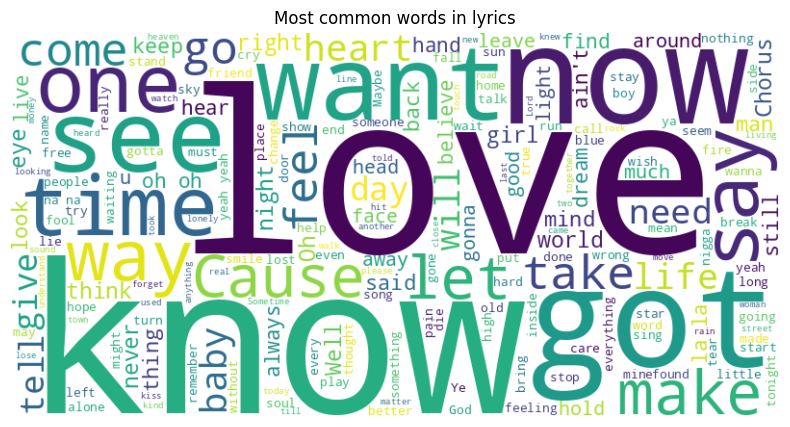

In [57]:
plt.figure(figsize=(10,5))
plt.imshow(worldcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most common words in lyrics")
plt.show()

Data Preprocessing